
# Project: No-show medical appointment analysis.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.The analysis seeks to find out factors that determine whether a patient will show up for an appointment or not.

### Dataset Description 
The dataset contains the following columns : 


PatientId - Patient identification.

AppointmentID - Appointment identification.

Gender - Patient gender (Male or Female).

ScheduledDay - The day patient set up their appointment.

AppointmentDay - The day of actual appointment when patient have to visit the doctor.

Age - patient Age

Neighbourhood - Hospital location.

Scholarship - Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família(0 for no & 1 for 
Yes).

Hipertension - Indicates whether or not the patient has hypertension or not(0 for no & 1 for Yes).

Diabetes - Indicates whether or not the patient has diabetes or not (0 for no & 1 for Yes).

Alcoholism - Indicates whether or not the patient has alcoholism or not (0 for no & 1 for Yes).

Handicap - Indicates whether or not the patient has handicap or not (on scale from 0 to 4 )

SMS_received = Indicates whether or not the patient received SMS (0 for no & 1 for Yes)

No-show = Indicates whether or not the patient attend the appointment(Yes for didn't show, No for show)






### Question(s) for Analysis

1. Does Gender determine whether a person shows up for an appointment or not?
2. Does the age group of a patient affect whether they showed up for an appointment or not?
3. How does being alcoholic or having a disease influence whether you show for an appointment or not?
4. Does the area a patient lives affect their hospital appointment show up ?

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action ='ignore', category=FutureWarning)


# DATA WRANGLING

# 1. Reading Data

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Lets define a function that reads data

def read(data):
    return pd.read_csv(data)

medical_df = read('noshow.csv')
medical_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# 2. Data Understanding

In [3]:
# Lets check the number of entries
medical_df.shape

(110527, 14)

The dataset had 110,527 entries and 14 columns

In [4]:
# Lets check for duplicated values

print('The dataset has ', medical_df.duplicated().sum().sum(), 'duplicate(s)')

The dataset has  0 duplicate(s)


In [5]:
# Lets check for missing values

print('The dataset has ', medical_df.isna().sum().sum(), ' missing value(s)')

The dataset has  0  missing value(s)


In [6]:
medical_df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
# Checking for the datatypes

medical_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The Scheduled Date and Appointment date had wrong data types.

Object instead of datetime

In [8]:
# Check the number of non null values in each column

medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Check the number of unique values in each column
medical_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We have seven columns which are binary. That is Gender,Scholarship,Hipertension,Diabetes,Alcoholism,SMS received,No-show

In [10]:
# Check for descriptive statistics

medical_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The age column had values which are negatives. We have to investigate the column

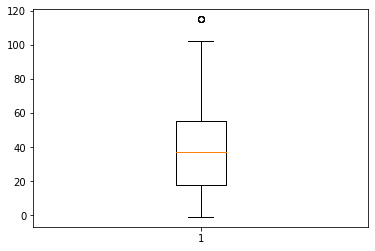

In [11]:
# Using boxplots to see the outliers in the column

data = medical_df['Age']
plt.boxplot(data);

In [12]:
# Display columns below 0 and those above 100

medical_df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
medical_df.query('Age>100')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


<Figure size 1000x300 with 0 Axes>

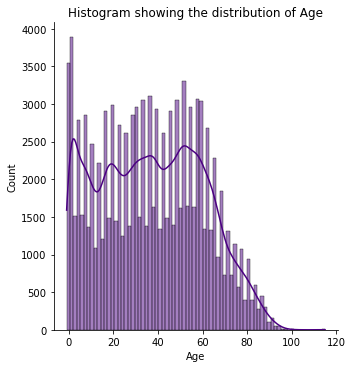

In [14]:
# Lets plot a histogram of the age column to see how age is distributed

plt.figure(figsize=(10,3), dpi=100)
sns.displot(medical_df['Age'],kde=True,color='indigo')
plt.title(f'Histogram showing the distribution of Age');

#### From the Data Understanding we found out

1. The data contains 110527 rows and 14 columns
2. We will to drop the 2 columns : PatientID and AppointmentID since they are not relevant onthe analysis.
3. The data did not have missing values.
4. No missing values in the data are reported.
5. The Schedule date and Appointment Date have incorrect data types i.e object instead of datetime.
6. Seven columns are Binary in nature that is We have seven columns which are binary that is Gender,Scholarship,Hipertension,Diabetes,Alcoholism,SMS received,No-show.
7. The age column had a minimum value of -1 and a max value of 115 years.
8. DISCLAIMER from the description given to the dataset : Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.




# 3. Data Cleaning

 

## Renaming

Lets rename the columns by :

    (i) Removing white spaces.
    
    (ii) Converting all the columns to the lowercase for easier computation.
    
    (iii) Renaming columns which are mispelt.

In [15]:
medical_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [16]:
# Lets rename columns
medical_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)


In [17]:
# Renaming
medical_df.rename(columns={'scheduledday' : 'scheduled_day','appointmentday':'appointment_day','hipertension': 'hypertension'},
                 inplace=True)

In [18]:
medical_df.head(2)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


## Dropping irrelevant columns

Drop two columns which are irrelevant to the analysis.

In [19]:
# Lets drop irrelevant columns

medical_df.drop(['patientid','appointmentid'],axis=1,inplace=True)

In [20]:
medical_df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


## Correcting Datatypes

We'll convert the scheduled_date and appointment column from strings to datetime.

In [21]:
#  Lets use a for loop to iterate through the columns and change them to datetime.

columns_names = ["scheduled_day", "appointment_day"]
for col in columns_names:
    medical_df[col] = pd.to_datetime(medical_df[col])
    

In [22]:
medical_df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [23]:
# Lets confirm the data types

medical_df.dtypes

gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handcap                          int64
sms_received                     int64
no-show                         object
dtype: object

## Investigate and clean the age column

1. Lets drop rows with negative values since its not practical to have a negative age.

2. Drop rows with values above 100 years because life expectancy is below 100 years worldwide.

A centenarian is a person who has reached the age of 100 years. Because life expectancies worldwide are below 100 years, the term is invariably associated with longevity according to [wikipedia](#https://en.wikipedia.org/wiki/Centenarian)

In [24]:
# Create a dataframe with negative values and display the values
negative_values = medical_df.query('age<0')
negative_values

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [25]:
# 1. Dropping the negative values

medical_df.drop(negative_values.index,inplace=True)

In [26]:
# Confirm if it has been dropped
medical_df.query('age<0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show


In [27]:
# 2. Drop ages above 100 years
over_100 = medical_df.query('age>100')
over_100


,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
58014,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No
63912,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
90372,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [28]:
# Drop the rows

medical_df.drop(over_100.index,inplace=True)

In [29]:
# Confirm if they are dropped
medical_df.query('age>100')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show


## Encoding the no-show column

In [30]:
medical_df['no-show'] = medical_df['no-show'].apply(lambda x : 0 if x == 'No' else 1)

In [31]:
medical_df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
# 4. Exploratory Data Analysis



# Research Question One: Does the area a patient resides affect whether they will attend an appointment or not?

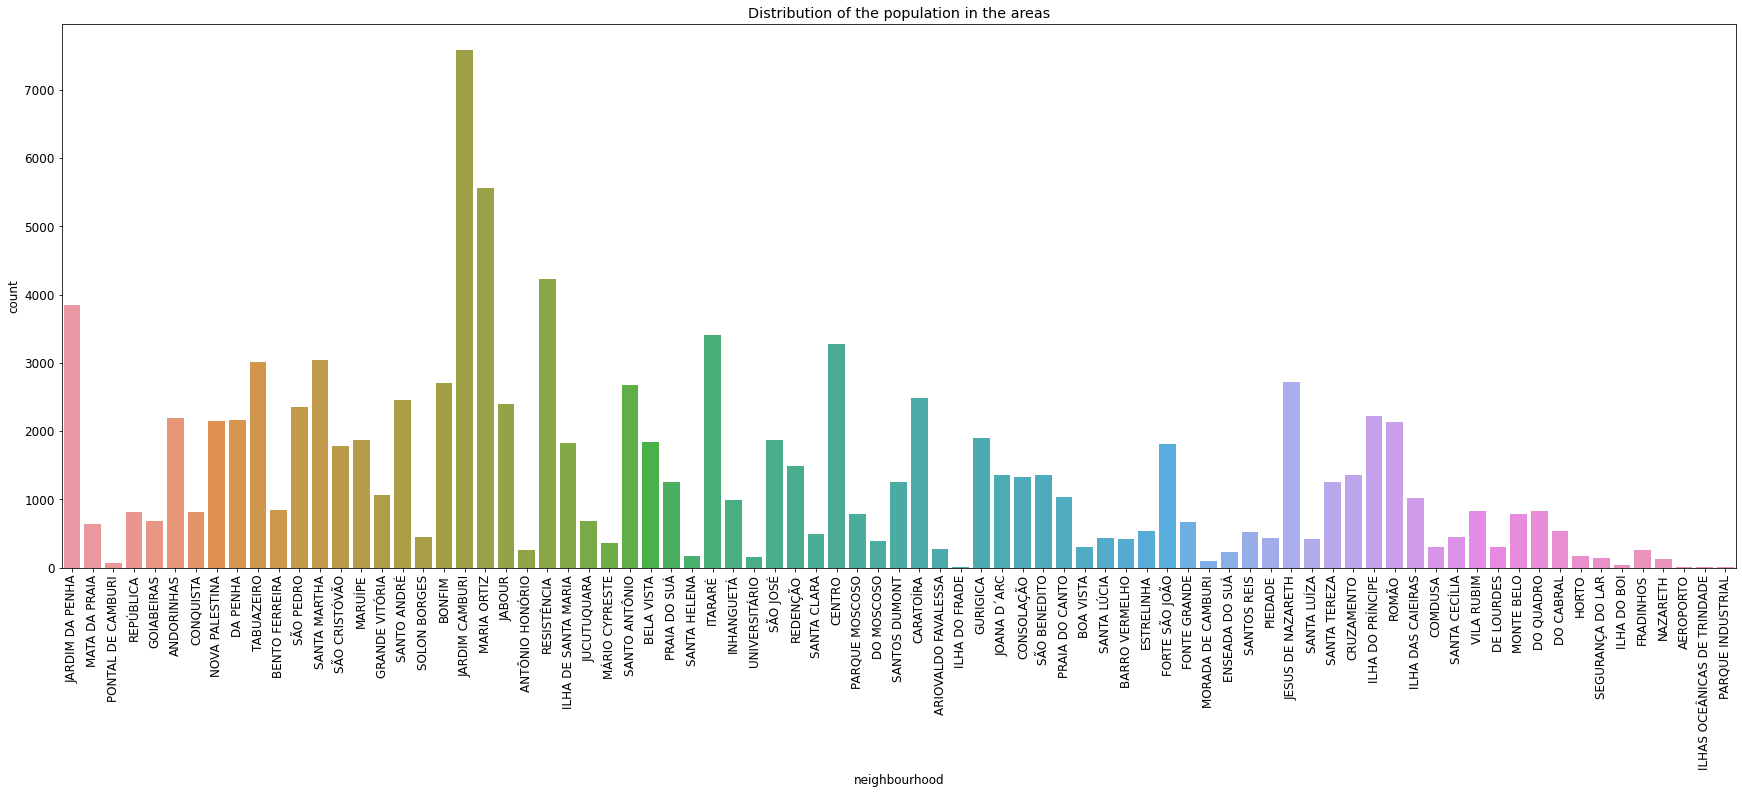

In [88]:
# Plotting distribution of data in the attendance column

plt.figure(figsize=(30,10))
sns.countplot(x=medical_df['neighbourhood'])
plt.title('Distribution of the population in the areas')
plt.xticks(rotation=90)
plt.show();

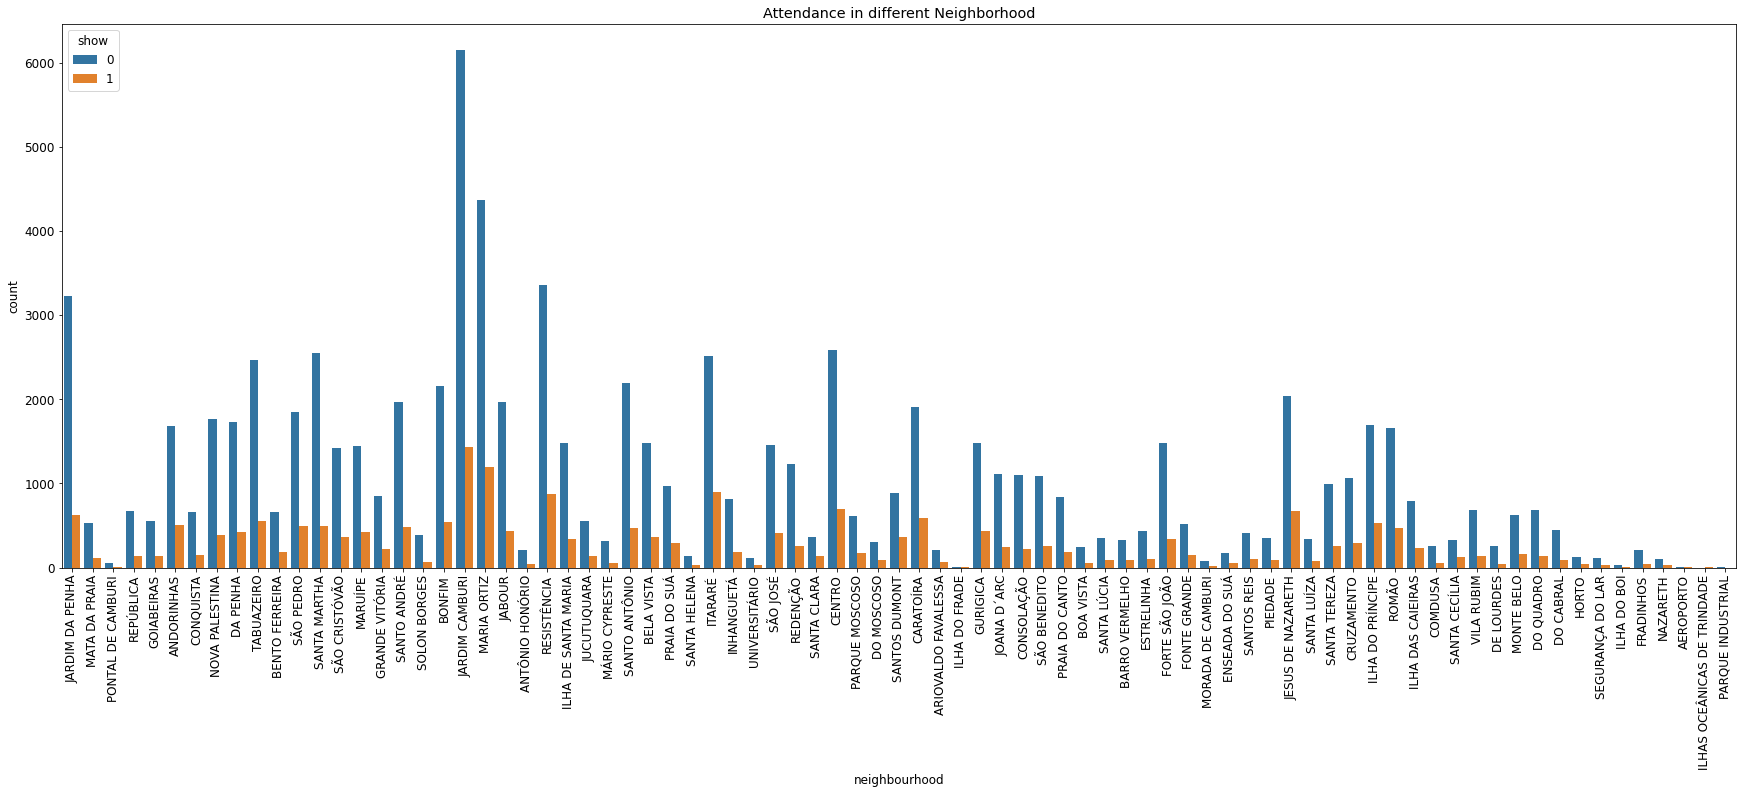

In [82]:
# Plotting a countplot showing those who attended and those who did not.
plt.figure(figsize=(30, 10))
sns.countplot(x=medical_df['neighbourhood'], hue=medical_df['show']);
plt.xticks(rotation=90);
plt.title('Attendance in different Neighborhood');

## Research Question Two : Does Gender affect if one attends hospital?

In [33]:
# Checking number of patients who attended and didn't attend

patients_count = medical_df["no-show"].value_counts()
patients_count

0    88203
1    22316
Name: no-show, dtype: int64

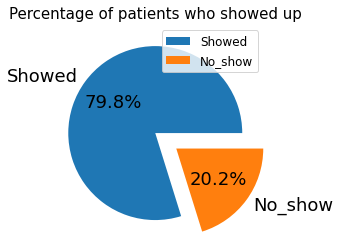

In [34]:
# Pie chart displays how many patient attended to appointment and how many didn't

plt.pie(patients_count,labels=["Showed", "No_show"], autopct='%1.1f%%', textprops={'fontsize': 18},
        explode = (0, 0.3))

plt.rcParams['font.size'] = 12
plt.title("Percentage of patients who showed up",fontsize=15)
plt.legend()
plt.show()

In [35]:
medical_df.rename(columns={'no-show' : 'show'},inplace=True)

From the visualization we can see that 79.8% from all patients already attended and 20.2% didn't attend

In [36]:
medical_df[['gender','show']].groupby('show').value_counts('gender')

show  gender
0     F         57241
      M         30962
1     F         14591
      M          7725
dtype: int64

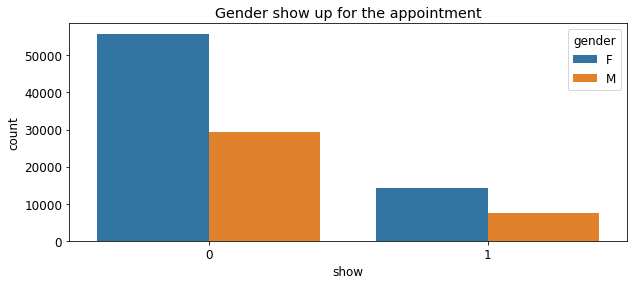

In [77]:
sns.countplot(x=medical_df['show'],hue=medical_df['gender'])
plt.title('Gender show up for the appointment')
plt.show()

From the visualization it's obvious that The attendance rate for Females is higher than male.

This maybe because we have more data of females but that also show that they vist hospitals more in general.

# Research Question Three: Does age affect whether one shows up for an appointment?

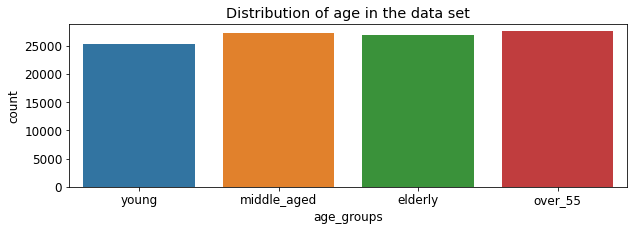

In [93]:
# Lets plot the distribution of patients by age groups
plt.figure(figsize=(10,3))
sns.countplot(x=medical_df['age_groups'])
plt.title('Distribution of age in the data set');

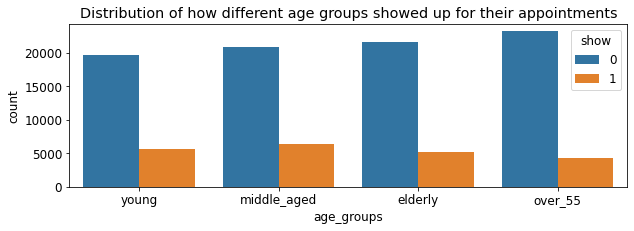

In [95]:
# Plot a visual to show whether one showed up for an appointment or not
plt.figure(figsize=(10,3))
sns.countplot(x=medical_df['age_groups'],hue=medical_df['show'])
plt.title('Distribution of how different age groups showed up for their appointments');

From the visual above we can see that age has no great impact to whther one shows up for their appointments or not.

# Research Question Four : Does alcoholism and diseases have any effect on whether one will show up for an appointment ?

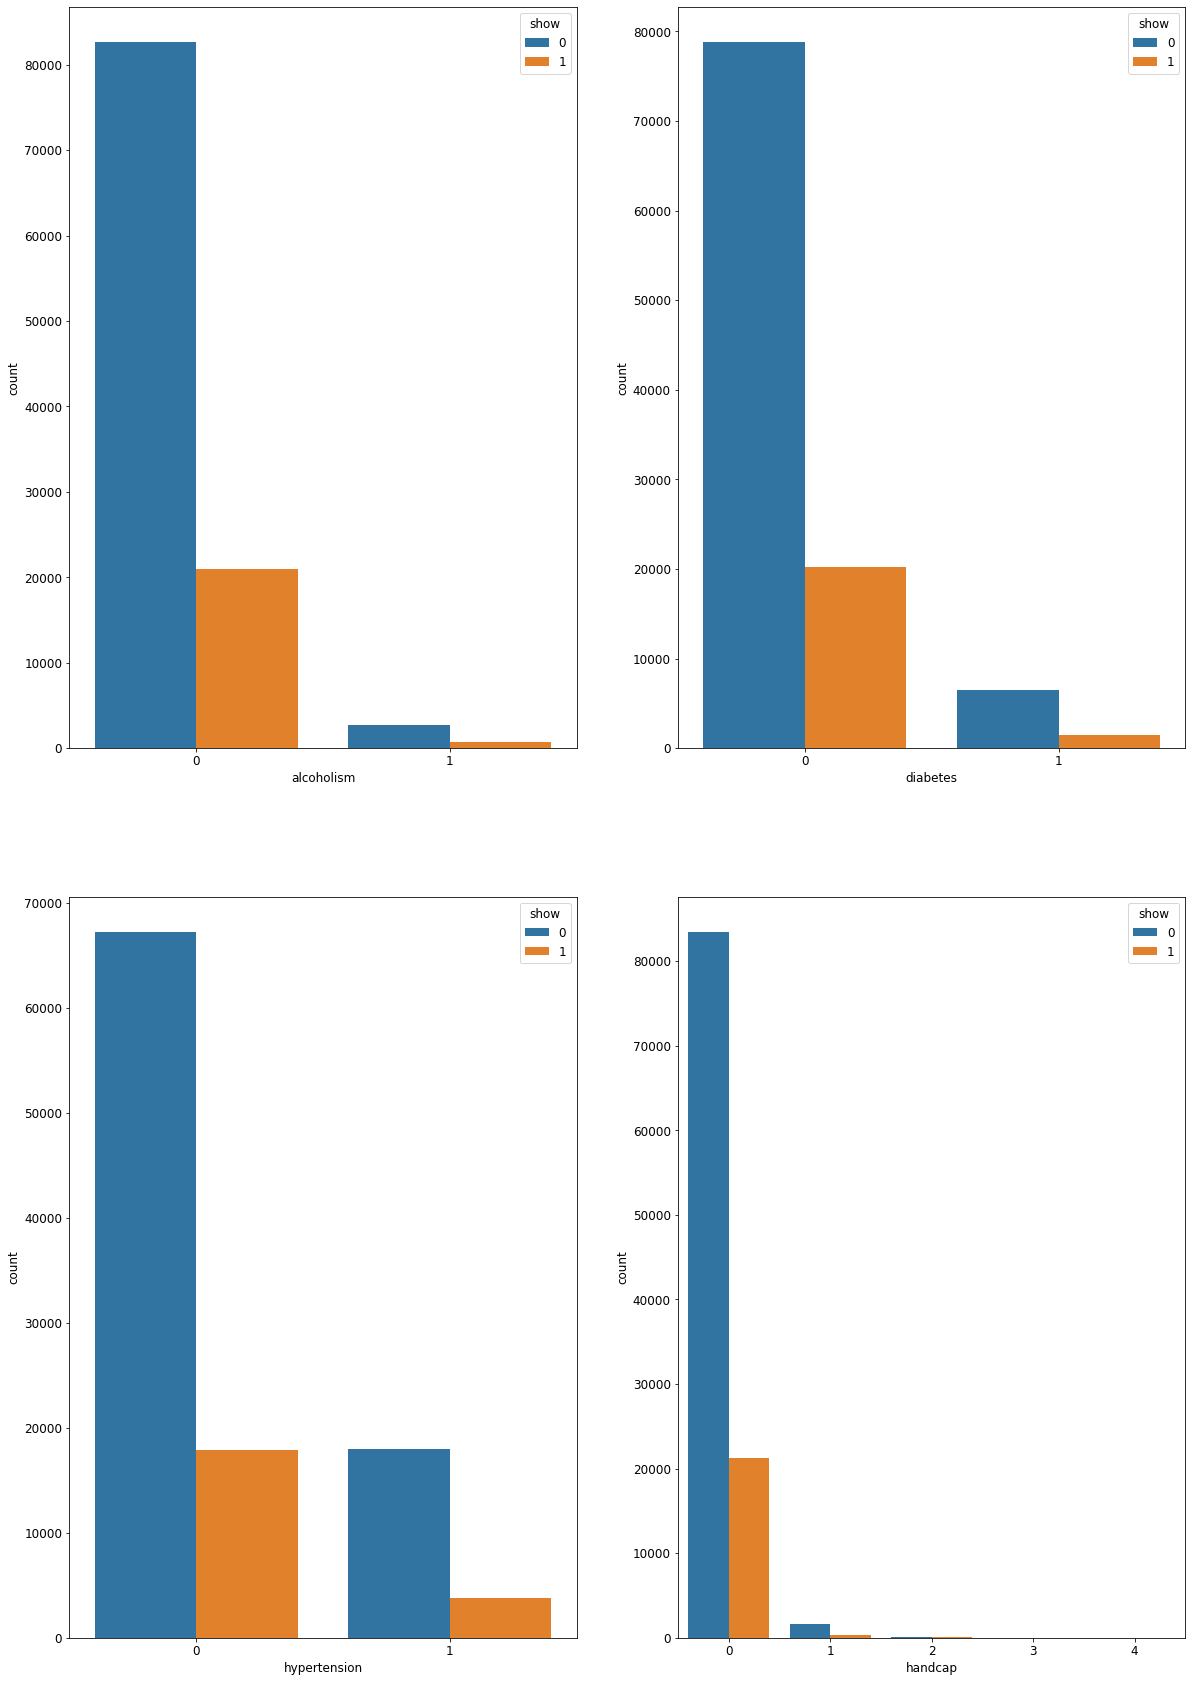

In [100]:
# Lets plot how alocoholism and other diseases affected whether one showed up for the appointment or not

condition_patients = medical_df[['alcoholism','diabetes','hypertension','handcap']]

plt.figure(figsize=(20,30))
plt.subplot(2,2,1)
sns.countplot(x=condition_patients['alcoholism'],hue = medical_df['show'])

plt.subplot(2,2,2)
sns.countplot(x=condition_patients['diabetes'],hue = medical_df['show'])

plt.subplot(2,2,3)
sns.countplot(x=condition_patients['hypertension'],hue = medical_df['show'])

plt.subplot(2,2,4)
sns.countplot(x=condition_patients['handcap'],hue = medical_df['show']);

We see that most of them don't have a disease and show up for appointment but we notice that patients of hypertension show up either when they are infected or not which is a mark that hypertension will probably show up more.

# 5. Conclusion.

Now we can see the factors that affect the absence of the patients more clearly. 

The gender and age are the most important factor as we saw earlier that female and youth show up for their appointment more than male and old people. 

Neighbohood and hypertension come after gender and age as there are some neighborhoods that the diseases are spread and patients with hypertension tend to show up if they have it or not. 

We need to search for more factors to help patient remember their appointments and show up.